<h1 style="color:blue"><b><center>Fetal Health Multi-Classification and adding explainability(SHAP,LIME)</center></b></h1>

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading data

In [2]:
fd=pd.read_csv(r"C:\Users\krish\Downloads\fetal_health.csv")

### Descriptive statistics

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [4]:
fd.shape
fd.columns
fd.dtypes

(2126, 22)

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [5]:
fd.describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057                  0.000590   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.000000              0.000000                  0.000000   
75%               0.003000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2126.000000                           2126.000000   
mean                         46.990122                              1.332785   
std                          17.192814                              0.883241   
min                          12.000000                              0.200000   
25%                          32.000000                              0.700000   
50%                          49.000000                              1.200000   
75%                          61.000000                              1.700000   
max                          87.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                         2126.00000       ...   
mean                                             9.84666       ...   
std                                             18.39688       ...   
min                                              0.00000       ...   
25%                                              0.00000       ...   
50%                                              0.00000       ...   
75%                                             11.00000       ...   
max                                             91.00000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count    2126.000000    2126.000000                2126.000000   
mean       93.579492     164.025400                   4.068203   
std        29.560212      17.944183                   2.949386   
min        50.000000     122.000000                   0.000000   
25%        67.000000     152.000000                   2.000000   
50%        93.000000     162.000000                   3.000000   
75%       120.000000     174.000000                   6.000000   
max       159.000000     238.000000                  18.000000   

       histogram_number_of_zeroes  histogram_mode  histogram_mean  \
count                 2126.000000     2126.000000     2126.000000   
mean                     0.323612      137.452023      134.610536   
std                      0.706059       16.381289       15.593596   
min                      0.000000       60.000000       73.000000   
25%                      0.000000      129.000000      125.000000   
50%                      0.000000      139.000000      136.000000   
75%                      0.000000      148.000000      145.000000   
max                     10.000000      187.000000      182.000000   

       histogram_median  histogr

### EDA through visualization

C:\Users\krish\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


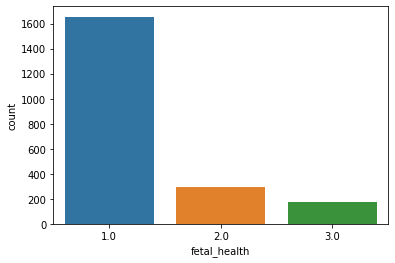

In [6]:
sns.countplot(fd.fetal_health)

### Multicollinearity check

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


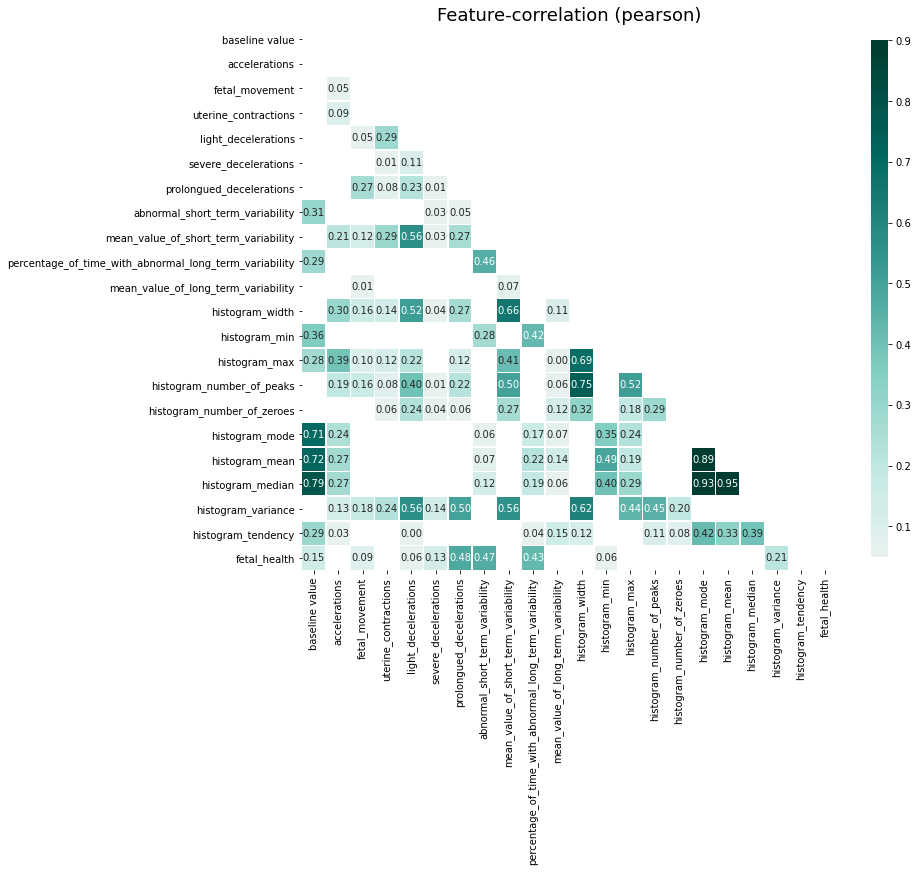

In [7]:
import klib
klib.corr_plot(fd, split='pos') 

#### Correlation w.r.to target variable

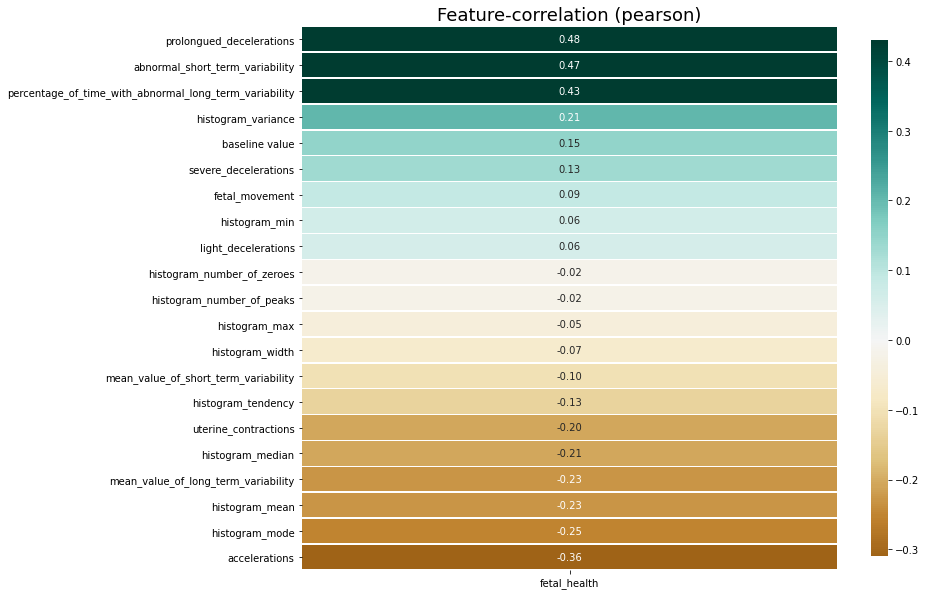

In [8]:
klib.corr_plot(fd, target='fetal_health')

### Column wise missing value check

In [9]:
fd.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

No missing values found

### Outlier detection (Using box plot)

--------------------------- baseline value ------------------------------


{'whiskers': [<matplotlib.lines.Line2D at 0x2c9b64c6b88>,
 'caps': [<matplotlib.lines.Line2D at 0x2c9b64c8e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c9b64c6388>],
 'medians': [<matplotlib.lines.Line2D at 0x2c9b64cc808>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c9b64ccfc8>],
 'means': []}

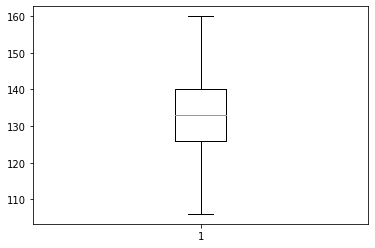

--------------------------- accelerations ------------------------------


{'whiskers': [<matplotlib.lines.Line2D at 0x2c9b6521e88>,
 'caps': [<matplotlib.lines.Line2D at 0x2c9b6539e08>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c9b65318c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2c9b653dc88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c9b653ddc8>],
 'means': []}

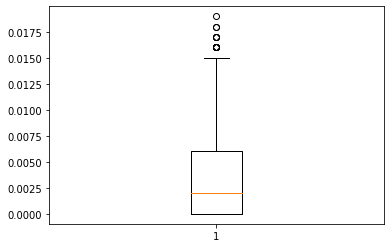

--------------------------- fetal_movement ------------------------------


{'whiskers': [<matplotlib.lines.Line2D at 0x2c9b65a79c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2c9b65ac7c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c9b65a7148>],
 'medians': [<matplotlib.lines.Line2D at 0x2c9b65b3648>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c9b65b3d48>],
 'means': []}

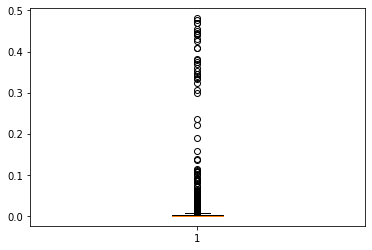

--------------------------- uterine_contractions ------------------------------


{'whiskers': [<matplotlib.lines.Line2D at 0x2c9b6610e88>,
 'caps': [<matplotlib.lines.Line2D at 0x2c9b6613c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c9b6610608>],
 'medians': [<matplotlib.lines.Line2D at 0x2c9b6617b08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c9b6617c48>],
 'means': []}

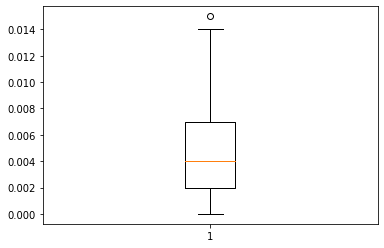

--------------------------- light_decelerations ------------------------------


{'whiskers': [<matplotlib.lines.Line2D at 0x2c9b666bfc8>,
 'caps': [<matplotlib.lines.Line2D at 0x2c9b6682fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c9b667ea88>],
 'medians': [<matplotlib.lines.Line2D at 0x2c9b6687e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c9b6687f88>],
 'means': []}

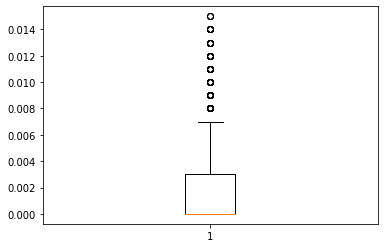

--------------------------- severe_decelerations ------------------------------


{'whiskers': [<matplotlib.lines.Line2D at 0x2c9b66f0708>,
 'caps': [<matplotlib.lines.Line2D at 0x2c9b66f0f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c9b66ece48>],
 'medians': [<matplotlib.lines.Line2D at 0x2c9b66f3d48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c9b66faa88>],
 'means': []}

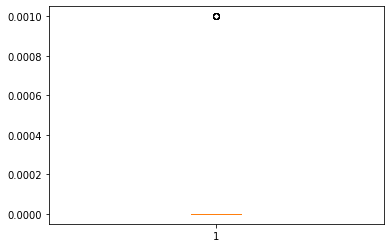

--------------------------- prolongued_decelerations ------------------------------


{'whiskers': [<matplotlib.lines.Line2D at 0x2c9b77166c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2c9b7730808>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c9b7729288>],
 'medians': [<matplotlib.lines.Line2D at 0x2c9b7734688>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c9b7734d88>],
 'means': []}

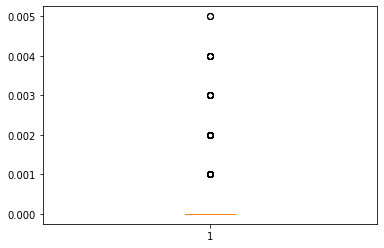

--------------------------- abnormal_short_term_variability ------------------------------


{'whiskers': [<matplotlib.lines.Line2D at 0x2c9b77949c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2c9b77977c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c9b7794188>],
 'medians': [<matplotlib.lines.Line2D at 0x2c9b779d648>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c9b779dd48>],
 'means': []}

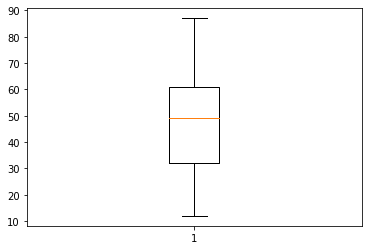

--------------------------- mean_value_of_short_term_variability ------------------------------


{'whiskers': [<matplotlib.lines.Line2D at 0x2c9b7800f48>,
 'caps': [<matplotlib.lines.Line2D at 0x2c9b7806e08>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c9b7800d48>],
 'medians': [<matplotlib.lines.Line2D at 0x2c9b780ac48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c9b7811988>],
 'means': []}

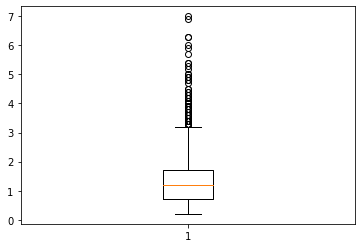

--------------------------- percentage_of_time_with_abnormal_long_term_variability ------------------------------


{'whiskers': [<matplotlib.lines.Line2D at 0x2c9b77bc748>,
 'caps': [<matplotlib.lines.Line2D at 0x2c9b77bcf48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c9b7870e88>],
 'medians': [<matplotlib.lines.Line2D at 0x2c9b7877d88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c9b787cac8>],
 'means': []}

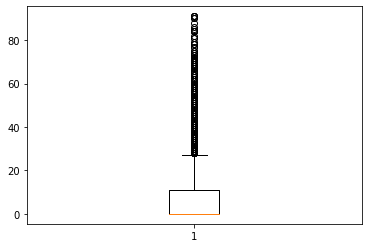

--------------------------- mean_value_of_long_term_variability ------------------------------


{'whiskers': [<matplotlib.lines.Line2D at 0x2c9b78c6c48>,
 'caps': [<matplotlib.lines.Line2D at 0x2c9b78ddc48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c9b78da648>],
 'medians': [<matplotlib.lines.Line2D at 0x2c9b78e2ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c9b78e2c08>],
 'means': []}

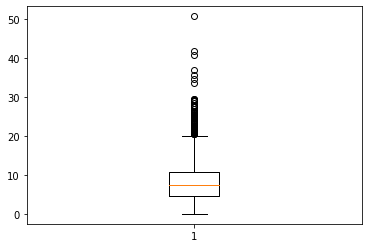

--------------------------- histogram_width ------------------------------


{'whiskers': [<matplotlib.lines.Line2D at 0x2c9b793dc48>,
 'caps': [<matplotlib.lines.Line2D at 0x2c9b7943a48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c9b793d3c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2c9b794a8c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c9b794afc8>],
 'means': []}

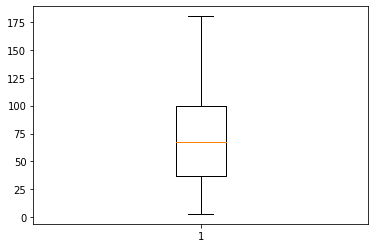

--------------------------- histogram_min ------------------------------


{'whiskers': [<matplotlib.lines.Line2D at 0x2c9b5ab4408>,
 'caps': [<matplotlib.lines.Line2D at 0x2c9b7818a48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c9b7971c08>],
 'medians': [<matplotlib.lines.Line2D at 0x2c9b7822508>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c9b7826288>],
 'means': []}

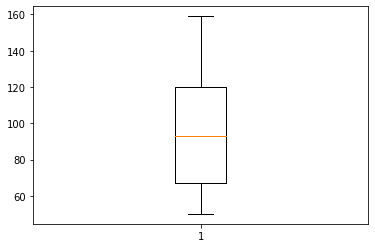

--------------------------- histogram_max ------------------------------


{'whiskers': [<matplotlib.lines.Line2D at 0x2c9b6713cc8>,
 'caps': [<matplotlib.lines.Line2D at 0x2c9b7723c48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c9b779d208>],
 'medians': [<matplotlib.lines.Line2D at 0x2c9b771cdc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c9b771c208>],
 'means': []}

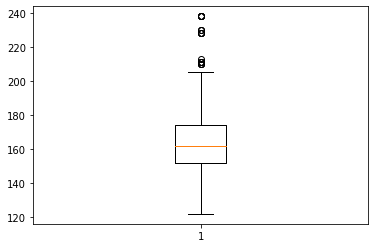

--------------------------- histogram_number_of_peaks ------------------------------


{'whiskers': [<matplotlib.lines.Line2D at 0x2c9b6712348>,
 'caps': [<matplotlib.lines.Line2D at 0x2c9b66a99c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c9b669bac8>],
 'medians': [<matplotlib.lines.Line2D at 0x2c9b66b2e08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c9b66b2dc8>],
 'means': []}

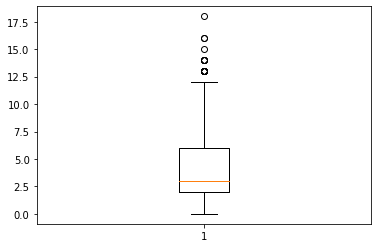

--------------------------- histogram_number_of_zeroes ------------------------------


{'whiskers': [<matplotlib.lines.Line2D at 0x2c9b654a788>,
 'caps': [<matplotlib.lines.Line2D at 0x2c9b653d1c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c9b6543308>],
 'medians': [<matplotlib.lines.Line2D at 0x2c9b6531908>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c9b5a8d988>],
 'means': []}

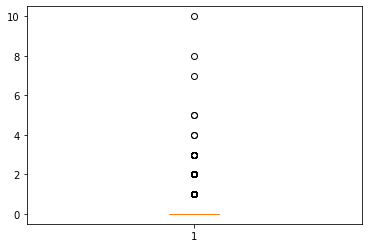

--------------------------- histogram_mode ------------------------------


{'whiskers': [<matplotlib.lines.Line2D at 0x2c9b62492c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2c9b5f53b88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c9b6249bc8>],
 'medians': [<matplotlib.lines.Line2D at 0x2c9b77d81c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c9b77d8bc8>],
 'means': []}

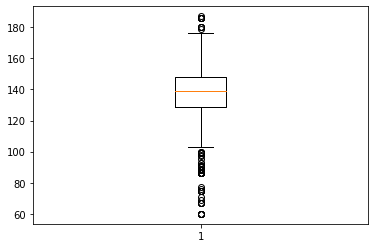

--------------------------- histogram_mean ------------------------------


{'whiskers': [<matplotlib.lines.Line2D at 0x2c9b6540c88>,
 'caps': [<matplotlib.lines.Line2D at 0x2c9b653ca88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c9b6540408>],
 'medians': [<matplotlib.lines.Line2D at 0x2c9b6536908>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c9b6536a48>],
 'means': []}

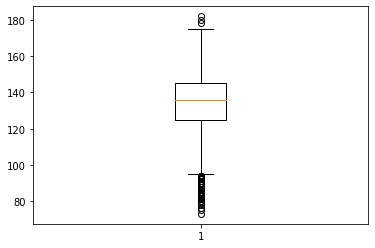

--------------------------- histogram_median ------------------------------


{'whiskers': [<matplotlib.lines.Line2D at 0x2c9b6655d48>,
 'caps': [<matplotlib.lines.Line2D at 0x2c9b65c4b48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c9b66554c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2c9b65e7c48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c9b65e7988>],
 'means': []}

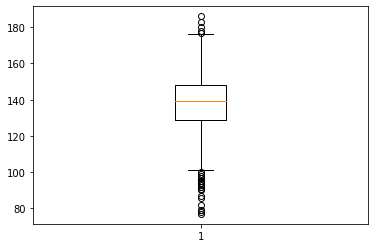

--------------------------- histogram_variance ------------------------------


{'whiskers': [<matplotlib.lines.Line2D at 0x2c9b6689ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x2c9b773cc08>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c9b7730808>],
 'medians': [<matplotlib.lines.Line2D at 0x2c9b771ba88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c9b771bbc8>],
 'means': []}

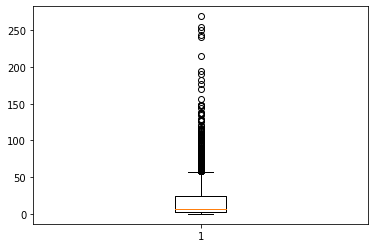

--------------------------- histogram_tendency ------------------------------


{'whiskers': [<matplotlib.lines.Line2D at 0x2c9b799fd48>,
 'caps': [<matplotlib.lines.Line2D at 0x2c9b79a3b48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c9b799f4c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2c9b79a79c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c9b79a7b08>],
 'means': []}

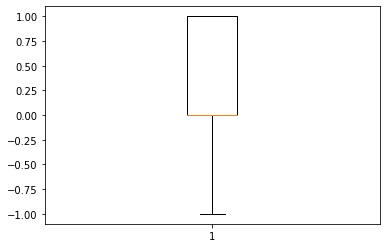

--------------------------- fetal_health ------------------------------


{'whiskers': [<matplotlib.lines.Line2D at 0x2c9b65186c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2c9b6518ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c9b6529e08>],
 'medians': [<matplotlib.lines.Line2D at 0x2c9b6513d08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c9b650da48>],
 'means': []}

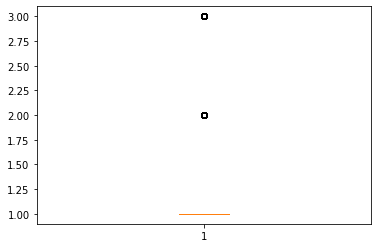

In [10]:
for i in fd.columns:
    print("--------------------------- "+i+" ------------------------------")
    plt.boxplot(fd[i])
    plt.show()

In [11]:
X=fd.iloc[:,:-1]
y=fd.iloc[:,-1]
y.value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [12]:
#!pip install --upgrade pip
#!pip install tensorflow

In [13]:
#!pip install --upgrade pip

In [14]:
# Artificial Neural Network

# Installing Theano
#!pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
# Install Tensorflow from the website: https://www.tensorflow.org/versions/r0.12/get_started/os_setup.html

# Installing Keras
#!pip install --upgrade keras

In [15]:
#!pip install np_utils

from tensorflow import keras 
from sklearn.preprocessing import LabelEncoder
#from keras.utils import np_utils
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
##### encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Ytr = encoder.transform(y_train)
##### convert integers to dummy variables (i.e. one hot encoded)
dummy_ytr = to_categorical(encoded_Ytr)


encoded_Yte = encoder.transform(y_test)
##### convert integers to dummy variables (i.e. one hot encoded)
dummy_yte = to_categorical(y)

In [16]:
y.head()

0    2.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: fetal_health, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40,stratify=y)

In [18]:
X_train.shape
y_train.shape

(1700, 21)

(1700,)

### Using Mutual Information Classifier to identify variables of higher explainability

In [19]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X_train, y_train,random_state=40)
mutual_info

array([0.12449741, 0.13836997, 0.02746517, 0.0451071 , 0.03935791,
       0.0031648 , 0.09124789, 0.19985514, 0.21707473, 0.19091671,
       0.07376684, 0.12670928, 0.11774905, 0.06440037, 0.01246555,
       0.00086073, 0.1536671 , 0.16677193, 0.14915315, 0.112322  ,
       0.01553975])

mean_value_of_short_term_variability                      0.217075
abnormal_short_term_variability                           0.199855
percentage_of_time_with_abnormal_long_term_variability    0.190917
histogram_mean                                            0.166772
histogram_mode                                            0.153667
histogram_median                                          0.149153
accelerations                                             0.138370
histogram_width                                           0.126709
baseline value                                            0.124497
histogram_min                                             0.117749
histogram_variance                                        0.112322
prolongued_decelerations                                  0.091248
mean_value_of_long_term_variability                       0.073767
histogram_max                                             0.064400
uterine_contractions                                      0.04

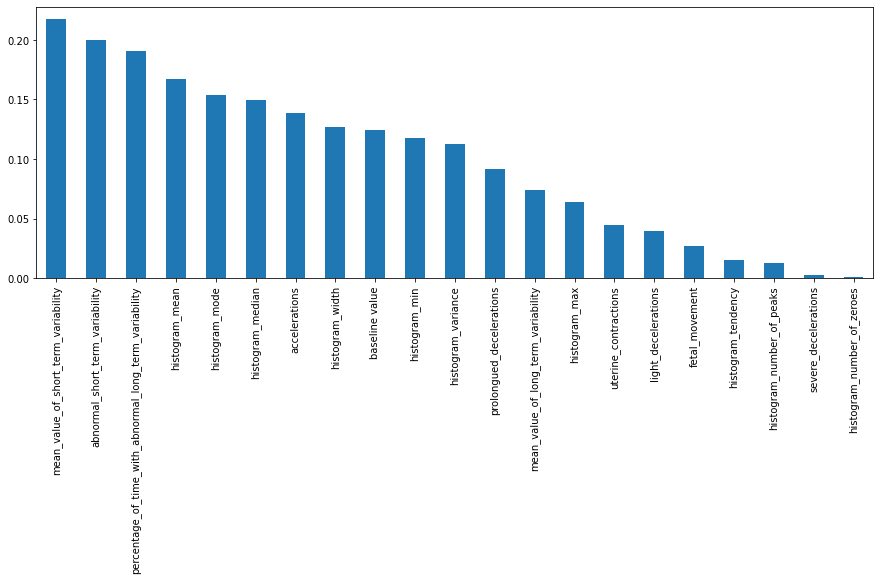

In [20]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [21]:
mutual_info.sort_values(ascending=False)[0:15]                    

mean_value_of_short_term_variability                      0.217075
abnormal_short_term_variability                           0.199855
percentage_of_time_with_abnormal_long_term_variability    0.190917
histogram_mean                                            0.166772
histogram_mode                                            0.153667
histogram_median                                          0.149153
accelerations                                             0.138370
histogram_width                                           0.126709
baseline value                                            0.124497
histogram_min                                             0.117749
histogram_variance                                        0.112322
prolongued_decelerations                                  0.091248
mean_value_of_long_term_variability                       0.073767
histogram_max                                             0.064400
uterine_contractions                                      0.04

From correlation plot since we observed correlation between histogram realted features lets replace them with alternate feature baseline value and so on.

In [22]:
fd_new=fd[['mean_value_of_short_term_variability','abnormal_short_term_variability',
           'percentage_of_time_with_abnormal_long_term_variability','accelerations','baseline value','prolongued_decelerations','mean_value_of_long_term_variability','uterine_contractions','fetal_health']]

In [23]:
X=fd_new.iloc[:,:-1]
y=fd_new.iloc[:,-1]
y.value_counts()
y=pd.get_dummies(y)

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40,stratify=y)

In [25]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [26]:
# determine the number of input features
n_features = X_train.shape[1]

In [27]:
X_train.head(20)

mean_value_of_short_term_variability  abnormal_short_term_variability  \
1441                                   1.0                             35.0   
142                                    0.9                             48.0   
350                                    0.3                             75.0   
825                                    0.4                             62.0   
2095                                   0.4                             75.0   
1685                                   3.3                             67.0   
1768                                   1.1                             64.0   
593                                    1.5                             37.0   
2010                                   1.0                             65.0   
158                                    0.9                             34.0   
433                                    0.9                             44.0   
746                                    2.7                             29.0   
519                                    1.5                             42.0   
1214                                   0.4                             62.0   
155                                    0.9                             38.0   
252                                    0.6                             57.0   
396                                    0.8                             51.0   
1763                                   1.6                             59.0   
615                                    2.0                             40.0   
1004                                   1.6                             23.0   

      percentage_of_time_with_abnormal_long_term_variability  accelerations  \
1441                                                0.0               0.010   
142                                                 0.0               0.000   
350                                                49.0               0.000   
825                                                59.0               0.000   
2095                                               13.0               0.000   
1685                                                0.0               0.004   
1768                                                0.0               0.000   
593                                                 0.0               0.004   
2010                                                0.0               0.000   
158                                                11.0               0.007   
433                                                 0.0               0.007   
746                                                 0.0               0.001   
519                                                 0.0               0.008   
1214                                               42.0               0.001   
155                                                14.0               0.002   
252                                                26.0               0.002   
396                                                 9.0               0.000   
1763                                                0.0               0.000   
615                                                 0.0               0.009   
1004                                                0.0               0.012   

      baseline value  prolongued_decelerations  \
1441           146.0                     0.000   
142            154.0                     0.000   
350            141.0                     0.000   
825            152.0                     0.000   
2095           133.0                     0.000   
1685           110.0                     0.001   
1768           120.0                     0.002   
593            120.0                     0.000   
2010           125.0                     0.001   
158            123.0                     0.000   
433            125.0                     0.000   
746            142.0                     0.000   
519            126.0                

### Feature Scaling (using robust scalar since data has many outliers)

In [28]:
from sklearn.preprocessing import  RobustScaler
robust_scaler = RobustScaler()
X_tr_rs = robust_scaler.fit_transform(X_train)
X_te_rs = robust_scaler.transform(X_test)

### Deep Learning for multi class classification

In [31]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(8, activation='relu', kernel_initializer='uniform', input_shape=(n_features,)))
model.add(Dense(10, activation='relu', kernel_initializer='uniform'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# fit the model
hist=model.fit(X_tr_rs, y_train, epochs=250, batch_size=32, verbose=0)
# evaluate the model
loss, acc = model.evaluate(X_te_rs, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.866


In [32]:
model.save("ann_fetal_health.h5")

In [33]:
from tensorflow.python.keras.models import load_model
ann_fh = load_model('ann_fetal_health.h5')
# summarize model.
ann_fh.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 33        
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________


In [34]:
score =ann_fh.evaluate(X_te_rs, y_test, batch_size=10)


print('Test loss:', score[0])  
print('Test accuracy:', score[1]) 

426/426 [==============================] - 0s 120us/sample - loss: 0.3561 - acc: 0.8662
Test loss: 0.35611299210241143
Test accuracy: 0.86619717


In [35]:
# Predicting the Test set results
y_pred_1 = ann_fh.predict(X_te_rs)
y_pred_1 = (y_pred_1 > 0.5)
from sklearn.metrics import classification_report
target_names = ['Normal', 'Suspect','Pathological']
print(classification_report(y_test, y_pred_1, target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.91      0.93      0.92       332
     Suspect       0.69      0.56      0.62        59
Pathological       0.64      0.51      0.57        35

   micro avg       0.87      0.85      0.86       426
   macro avg       0.75      0.67      0.70       426
weighted avg       0.86      0.85      0.85       426
 samples avg       0.85      0.85      0.85       426



C:\Users\krish\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
# Making the Confusion Matrix
from sklearn.metrics import multilabel_confusion_matrix
cm = multilabel_confusion_matrix(y_test, y_pred_1)
cm

array([[[ 63,  31],
        [ 22, 310]],

       [[352,  15],
        [ 26,  33]],

       [[381,  10],
        [ 17,  18]]], dtype=int64)

### Explainability

### a) SHAPLEY

In [45]:
import shap

In [47]:
deep_explainer = shap.DeepExplainer(model.predict,X_tr_rs)

Using 1700 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [50]:
shap_values = deep_explainer.shap_values(X_te_rs,nsamples=10)

  0%|          | 0/426 [00:00<?, ?it/s]

Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=1.608e-06, with an active set of 7 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.261e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.199e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 6 iterations, alpha=1.048e-03, previous alpha=8.594e-04, with an active set of 5 regressors.
Regressors in active set degenerate. Dropping a regressor, after 1 iteration

Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=6.844e-04, with an active set of 3 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.858e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.858e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=7.100e-05, with an active set of 5 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=8.158e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.910e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=8.128e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.116e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.139e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=8.145e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=5.788e-05, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=2.433e-05, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=7.469e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=3.174e-05, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=4.574e-07, with an active set of 7 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.554e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.062e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.031e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.798e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=3.013e-04, with an active set of 7 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.091e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.045e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.977e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.572e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.266e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=1.219e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=1.219e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 8 iterations, i.e. alpha=3.886e-06, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.207e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=5.602e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.904e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=8.314e-06, with an active set of 6 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.653e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.327e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=5.354e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=5.354e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.357e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.656e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.818e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.545e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.376e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.688e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.389e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.614e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.129e-05, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=6.129e-05, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=4.534e-05, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.303e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=9.611e-04, with an active set of 3 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.805e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=6.831e-05, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.593e-06, with an active set of 6 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.513e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.019e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.956e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=4.454e-05, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.843e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=9.183e-05, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=9.054e-05, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.829e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.609e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=9.828e-06, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=3.536e-06, with an active set of 7 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.279e-06, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.833e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.036e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=3.864e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.627e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=2.914e-05, with an active set of 7 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.394e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.197e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.463e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.813e-05, with an active set of 3 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.406e-05, with an active set of 4 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.406e-05, with an active set of 4 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.985e-06, with an active set of 5 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.800e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.278e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.263e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.275e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.875e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.076e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=7.337e-04, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.693e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.298e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.074e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=9.602e-05, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=8.873e-05, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.010e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=5.049e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=5.015e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=1.857e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.225e-04, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.613e-04, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.867e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.262e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.978e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.489e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.413e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=6.568e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=4.017e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.821e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.410e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.286e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.127e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.722e-04, with an active set of 3 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.471e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=7.350e-05, with an active set of 7 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.911e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=6.827e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=2.487e-04, with an active set of 7 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.872e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.751e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=1.375e-04, with an active set of 7 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=7.366e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.683e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.901e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.950e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.419e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.051e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.463e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.785e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=9.774e-05, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=4.147e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=3.638e-05, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.457e-05, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.501e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=5.003e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.379e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=6.894e-04, with an active set of 3 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.343e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=6.907e-05, with an active set of 5 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.071e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=5.355e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 6 iterations, alpha=4.544e-04, previous alpha=3.538e-04, with an active set of 5 regressors.
Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=2.572e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 8 iteration

Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.411e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.211e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=9.283e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.735e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.192e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 9 iterations, i.e. alpha=4.146e-04, with an active set of 7 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.715e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.436e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.062e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=5.658e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 6 iterations, alpha=5.584e-04, previous alpha=4.756e-04, with an active set of 5 regressors.
Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=7.249e-04, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 7 iteration

Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=8.724e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=4.345e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=4.317e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.278e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.534e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.267e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=4.316e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=8.967e-04, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.793e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.345e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=3.240e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.581e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.604e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.796e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=5.857e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=5.857e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.854e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=6.259e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=3.129e-04, with an active set of 7 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.239e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.233e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=6.179e-05, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.010e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.856e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.304e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.637e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.615e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.165e-06, with an active set of 6 regressors, and the smallest cholesky pivot element being 3.332e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.583e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=5.516e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=2.758e-03, with an active set of 7 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.972e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 8 iterations, i.e. alpha=2.287e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.360e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=6.802e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=2.256e-05, with an active set of 7 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.624e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=6.882e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.654e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=7.965e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.211e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.655e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.262e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=8.835e-05, with an active set of 7 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.136e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.232e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.949e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.949e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.462e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.000e-05, with an active set of 5 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.000e-05, with an active set of 6 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.


#### Global explainability

In [58]:
X.columns

Index(['mean_value_of_short_term_variability',
       'abnormal_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'accelerations', 'baseline value', 'prolongued_decelerations',
       'mean_value_of_long_term_variability', 'uterine_contractions'],
      dtype='object')

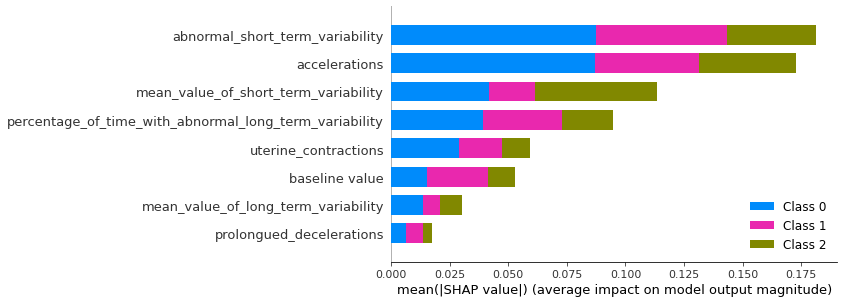

In [59]:
shap.summary_plot(shap_values,X_te_rs,feature_names=X.columns)

#### Local explainability

In [111]:
len(shap_values)
len(X_te_rs)
len(shap_values[0])
len(shap_values[0][0])
shap_values[0][0]
shap_values[1][0]
deep_explainer.expected_value

3

426

426

8

array([0.        , 0.        , 0.        , 0.12786132, 0.        ,
       0.        , 0.09757272, 0.        ])

array([ 0.        ,  0.        ,  0.        , -0.06320677,  0.        ,
        0.        , -0.07097798,  0.        ])

array([0.77429231, 0.13445776, 0.09124993])

##### 1.a Let us see the individual contribution of each feature to the outcome for first instance out of 426 instances w.r.to first target class

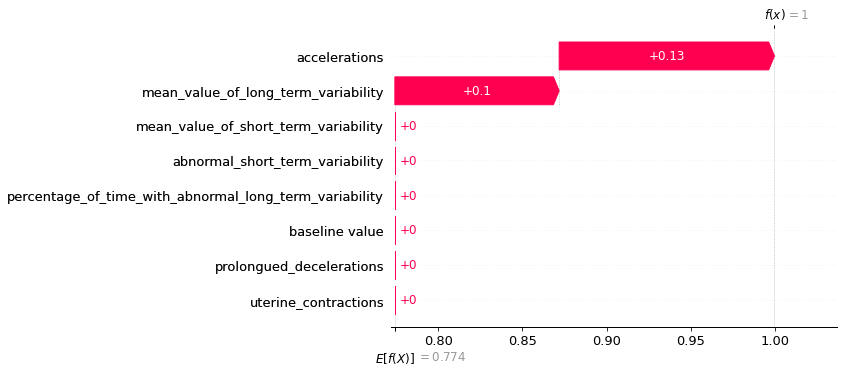

In [101]:
shap.initjs()
#shap.force_plot(deep_explainer.expected_value, shap_values[0] ,X_te_rs[0],feature_names=X.columns)
shap.plots._waterfall.waterfall_legacy(deep_explainer.expected_value[0], shap_values[0][0],feature_names=X.columns)

Observation: Average value of input/train data is E[f(X)]=0.774 for this class and the predicted value for this instance is f(x)=1. Hence total contribution of features which is equal to (f(x) - E[f(x)]) = 1.0-0.774 = 0.226 i.e., accelaration contribution 0.13 + mean_value_of_long_term_variability contribution 0.1

##### 1.b Let us see the individual contribution of each feature to the outcome for second instance out of 426 instances w.r.to first target class

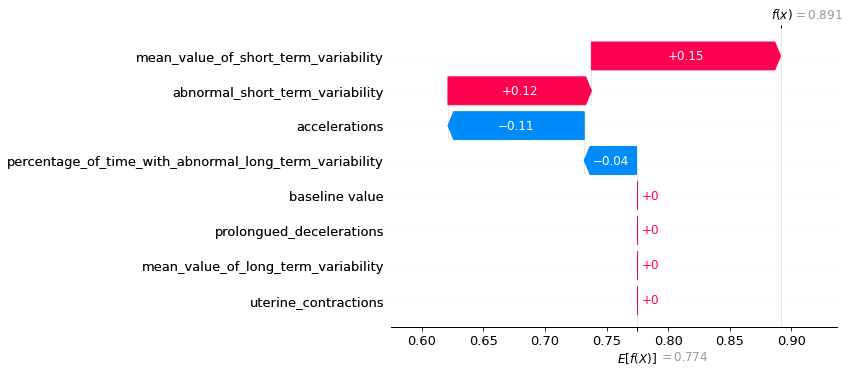

In [109]:
shap.initjs()
#shap.force_plot(deep_explainer.expected_value, shap_values[0] ,X_te_rs[0],feature_names=X.columns)
shap.plots._waterfall.waterfall_legacy(deep_explainer.expected_value[0], shap_values[0][1],feature_names=X.columns)

Observation: Average value of input/train data is E[f(X)]=0.774 for this class and the predicted value for this instance is f(x)=0.891. Hence total contribution of features which is equal to (f(x) - E[f(x)]) = 0.891-0.774 = 0.117 i.e., accelaration contribution -0.11 + mean_value_of_long_term_variability contribution 0.15 + abnormal_short_term_variability 0.12 + percentage_of_time_with_abnormal_long_term_variability -0.04

#### 2.a ) Let us see the individual contribution of each feature to the outcome for first instance out of 426 instances  w.r.to second target class

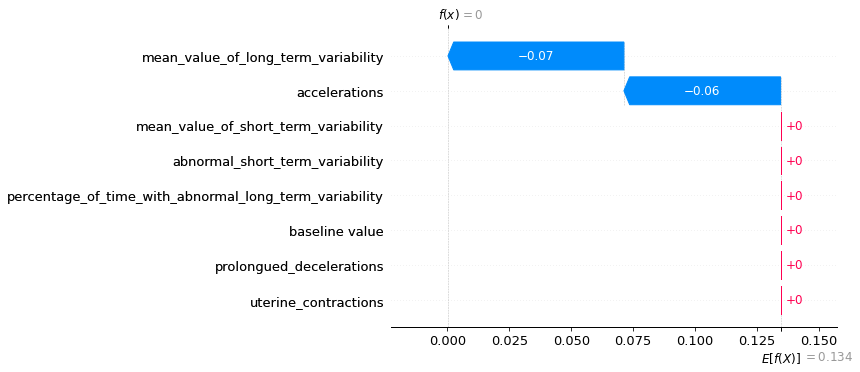

In [112]:
shap.initjs()
#shap.force_plot(deep_explainer.expected_value, shap_values[0] ,X_te_rs[0],feature_names=X.columns)
shap.plots._waterfall.waterfall_legacy(deep_explainer.expected_value[1], shap_values[1][0],feature_names=X.columns)

Observation: Average value of input/train data is E[f(X)]=0.134 for this class and the predicted value for this instance is f(x)=0. Hence total contribution of features which is equal to (f(x) - E[f(x)]) = 0-0.134 = -0.134 i.e., accelaration contribution -0.06 + mean_value_of_long_term_variability contribution -0.07

#### 2.b ) Let us see the individual contribution of each feature to the outcome for second instance out of 426 instances  w.r.to second target class

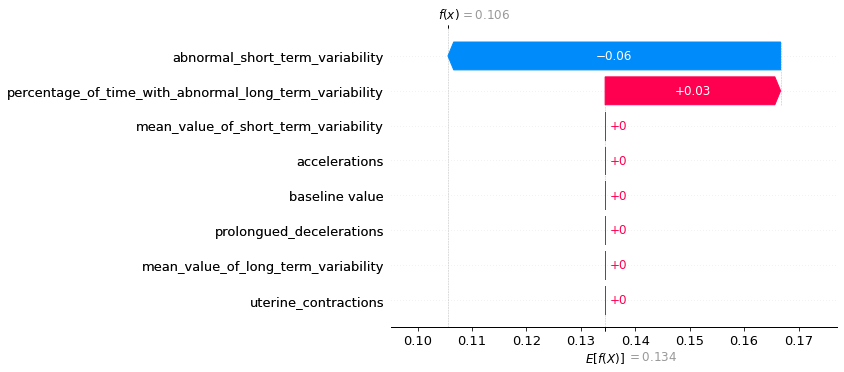

In [113]:
shap.initjs()
#shap.force_plot(deep_explainer.expected_value, shap_values[0] ,X_te_rs[0],feature_names=X.columns)
shap.plots._waterfall.waterfall_legacy(deep_explainer.expected_value[1], shap_values[1][1],feature_names=X.columns)

#### 3.a ) Let us see the individual contribution of each feature to the outcome for first instance out of 426 instances w.r.to third target class

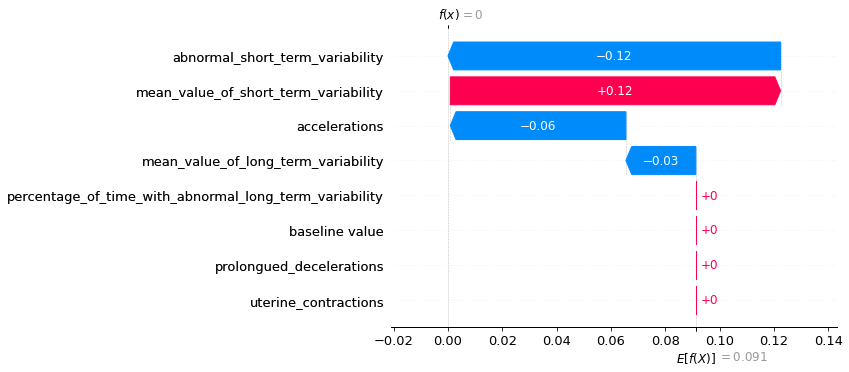

In [118]:
shap.initjs()
#shap.force_plot(deep_explainer.expected_value, shap_values[0] ,X_te_rs[0],feature_names=X.columns)
shap.plots._waterfall.waterfall_legacy(deep_explainer.expected_value[2], shap_values[2][0],feature_names=X.columns)

Observation: Average value of input/train data is E[f(X)]=0.091 for this class and the predicted value for this instance is f(x)=0. Hence total contribution of features which is equal to (f(x) - E[f(x)]) = 0-0.091 = -0.091 i.e., accelaration contribution -0.06 + mean_value_of_long_term_variability contribution -0.03 + abnormal_short_term_variability contribution -0.12 +  mean_value_of_short_term_variablity contribution 0.12.

#### 3.b ) Let us see the individual contribution of each feature to the outcome for second instance out of 426 instances  w.r.to third target class

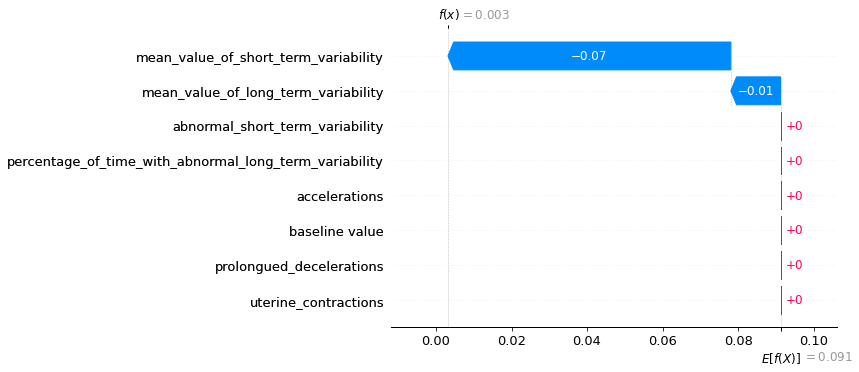

In [119]:
shap.initjs()
#shap.force_plot(deep_explainer.expected_value, shap_values[0] ,X_te_rs[0],feature_names=X.columns)
shap.plots._waterfall.waterfall_legacy(deep_explainer.expected_value[2], shap_values[2][1],feature_names=X.columns)

Observation: Average value of input/train data is E[f(X)]=0.091 for this class and the predicted value for this instance is f(x)=0.003. Hence total contribution of features which is equal to (f(x) - E[f(x)]) = 0.003-0.091 = -0.088 i.e., mean_value_of_long_term_variability contribution -0.01 +  mean_value_of_short_term_variablity contribution -0.07.

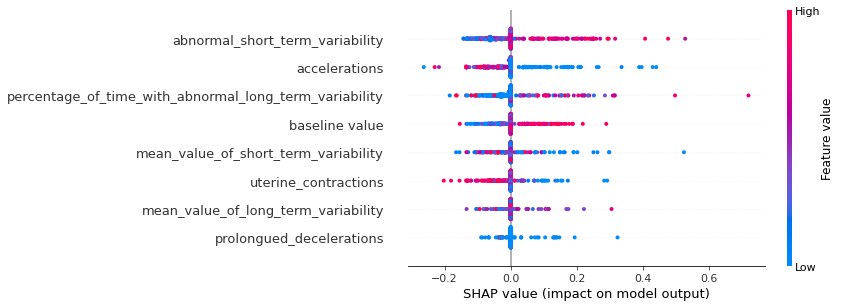

In [133]:
shap.summary_plot(shap_values[1], X_te_rs, feature_names = X.columns)

Each point on the summary plot is a Shapley value for a feature and an instance. Each point on the summary plot is a Shapley value for a feature and an instance.
abnormal_short_term_variablity has higher and prolongued_decelerations has lower importance. Higher feature value of abnormal_short_term_variability has higher importance.

### b) LIME interpretability

In [134]:
import lime
from lime import lime_tabular

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_tr_rs),
    feature_names=X_train.columns,
    class_names=['normal', 'suspect','pathological'],
    mode='classification'
)

In [141]:
exp = lime_explainer.explain_instance(
    data_row=X_te_rs[0], 
    predict_fn=model.predict_proba
)

exp.show_in_notebook(show_table=True)

The model is 100% condident that the first row is normal in fetal health.

In [144]:
y_test[0:5]

1.0  2.0  3.0
1361    1    0    0
1527    0    1    0
1875    1    0    0
1556    1    0    0
1984    1    0    0

In [142]:
exp = lime_explainer.explain_instance(
    data_row=X_te_rs[1], 
    predict_fn=model.predict_proba
)

exp.show_in_notebook(show_table=True)

The model is 89% condident that it is normal fetal health.